
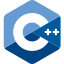
<br>

<div style="text-align:center; font-size:200%;">
  <b>Test-Doubles</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Academy Munich</div>
<br/>
<!-- 01 Test-Doubles.ipynb -->
<!-- slides/module_410_unit_testing/topic_162_test_doubles.cpp -->


## Test Doubles

- Simplified version of a dependency in the system
  - e.g. replace a database query with a fixed value
- Test Doubles are important for simplifying tests
- They typically require an interface that they implement
- But: too many or complex test doubles make tests confusing
  - What is actually being tested by a test?


## Types of Test Doubles

- Outgoing dependencies ("Mocks")
  - Mocks
  - Spies
- Incoming dependencies ("Stubs")
  - Dummies
  - Stubs
  - Fakes


## Dummy

- Object that only serves as a placeholder
- Passed, but not used
- In C++ sometimes `nullptr`
- Also for outgoing dependencies


## Stub

- Object that provides a minimal implementation of a dependency
- Typically always returns the same value
- Used to
  - replace complex dependencies
  - make tests deterministic


## Fake

- Object that provides a simpler implementation of a dependency
- Can be e.g. an in-memory database
- Used to
  - speed up tests
  - simplify test configuration


## Spy

- Object that stores information about the interaction with it
- Used to
  - check if a dependency is used correctly


## Mock

- Object that stores information about the expected interaction
- Typically declaratively configurable
- Automated implementation of spies
- Used to
  - check if a dependency is used correctly

## Example: E-Commerce System

We want to add an item to a shopping cart.

- The `CartManager` is the class to be tested (System Under Test).
- It uses a `ProductPriceProvider` to get the price of an item (incoming dependency).
- It uses a `ShoppingCart` to add the item (outgoing dependency).

First, we define the interfaces for our dependencies:

In [ ]:
class ProductPriceProvider
{
public:
    virtual ~ProductPriceProvider() = default;
    virtual double get_price(const std::string& product_id) = 0;
};

In [ ]:
class ShoppingCart
{
public:
    virtual ~ShoppingCart() = default;
    virtual void add_item(const std::string& product_id, double price) = 0;
};


## The Class Under Test: `CartManager`

The `CartManager` gets the price and adds the item to the cart.

In [ ]:
struct CartManager
{
    ProductPriceProvider& price_provider;
    ShoppingCart& cart;

    void add_to_cart(const std::string& product_id)
    {
        double price{price_provider.get_price(product_id)};
        cart.add_item(product_id, price);
    }
};


## The Test Doubles: Stub and Spy

- For the `ProductPriceProvider` we use a **Stub** that returns a fixed
  price.
- For the `ShoppingCart` we use a **Spy** that records which items were
  added.


In the test, we verify that the `CartManager` used the `ShoppingCart`
correctly.

In [ ]:
#include "check.h"
#include <string>
#include <vector>


## Typical use of test doubles:

- database access, file system access
- time, random values
- non-determinism
- hidden state


## Workshop: Testing a Spacecraft Controller

Your task is to implement a test suite for a `SpacecraftCommandController`.
This class sends commands to a spacecraft. Its responsibilities are:

- Mission safety is paramount: Check the system status (`TelemetrySystem`)
  before executing commands.
- Execute maneuvers with the thrusters (`ThrusterControl`).
- Notify ground control about command status (`GroundControlLink`).

First, the interfaces for the spacecraft's subsystems:

In [ ]:
#include <string>
#include <vector>

In [ ]:
enum class SubSystem { Core, Thrusters, ScienceBay };

In [ ]:
class TelemetrySystem {
public:
    virtual ~TelemetrySystem() = default;
    virtual int get_power_level_percent(SubSystem system) = 0;
};

In [ ]:
class ThrusterControl {
public:
    virtual ~ThrusterControl() = default;
    virtual void fire_thrusters(int duration_ms) = 0;
};

In [ ]:
class GroundControlLink {
public:
    virtual ~GroundControlLink() = default;
    virtual void send_status_report(const std::string& report) = 0;
};

The class under test: `SpacecraftCommandController`.

In [ ]:
class SpacecraftCommandController {
private:
    TelemetrySystem& telemetry;
    ThrusterControl& thrusters;
    GroundControlLink& ground_control;

public:
    SpacecraftCommandController(TelemetrySystem& tel, ThrusterControl& thr, GroundControlLink& gc)
        : telemetry{tel}, thrusters{thr}, ground_control{gc} {}

    void execute_burn_maneuver(int duration_ms) {
        int power_level{telemetry.get_power_level_percent(SubSystem::Thrusters)};
        if (power_level < 50) {
            ground_control.send_status_report("ERROR: Thruster power too low for maneuver.");
            return;
        }

        thrusters.fire_thrusters(duration_ms);
        ground_control.send_status_report("SUCCESS: Maneuver executed.");
    }
};


## Your Task

Write tests for the following scenarios. Implement the necessary test
doubles.

1.  **Successful Maneuver:** The thruster system has sufficient power (>50%).
    Verify that the `fire_thrusters` command is sent and a success report is
    sent to ground control.
2.  **Maneuver Aborted (Low Power):** The thruster system has insufficient
    power (<50%). Verify that the thrusters are **not** fired and an error
    report is sent to ground control.